In [59]:
#Import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.offline as py
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import accuracy_score
import plotly.graph_objs as go
import warnings
warnings.simplefilter("ignore") # Change the filter in this process

In [89]:
# Read data
df = pd.read_csv("wisconsin breast cancer data.csv")

In [90]:
#To determine the datatype and number of instances of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [91]:
#Check for any missing values
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [92]:
#Alternatively, can check for missing values using sum function
df.isnull().any().sum()

0

In [93]:
#Drop any columns that would not be required in the model -> in this case, we do not need the "id" column
df.drop("id", axis = 1, inplace = True)

In [94]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [96]:
# count unique values in 'diagnosis" column
unique_values = df['diagnosis'].value_counts()

print(unique_values)

B    357
M    212
Name: diagnosis, dtype: int64


<h1> Based on the preliminary data overview conducted, there are two steps we need to take prior to data pre-processing: </h1>

<p1> 1. Convert the datatype of the **"Diagnosis"** column from object to a binary variable </p1>

<p2> 2. **Standardise** the dataset using Z-Score function, but only after doing data visualizations and on the trainset </p2>

<p3> 3. The Data is **imbalanced** for the 'diagnosis' outcome variable </p3>
    
<p4> Currently, the "Diagnosis" column has values "M" and "B" respectively. Instead, we can convert this into a binary variable with "0" representing Benign and "1" representing Malignant. Furthermore, based on the df.describe() function as showcased above, there are certain features such as area_mean and texture_mean that have values in the hundreds, whilst smoothness_mean and compactness_mean have values in the one-tenths range (decimals). As such, we need to standardise the data to scale the values to a range of 0 to 1, prior to training the models. </p4>


In [66]:
#Converting the categorical "Diagnosis" to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

<AxesSubplot:xlabel='fractal_dimension_mean', ylabel='Density'>

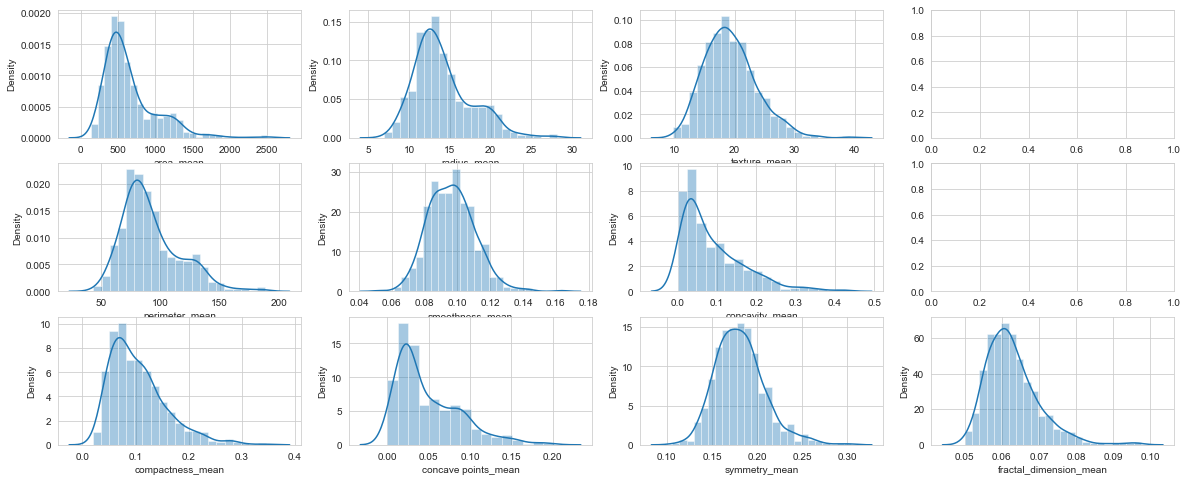

In [67]:
#Checking distribution of data features for "mean" 
fig, axes = plt.subplots(3,4,figsize=(20,8))
sns.distplot(df['area_mean'],ax = axes[0,0])
sns.distplot(df['radius_mean'],ax = axes[0,1])
sns.distplot(df['texture_mean'],ax = axes[0,2])
sns.distplot(df['perimeter_mean'],ax = axes[1,0])
sns.distplot(df['smoothness_mean'],ax = axes[1,1])
sns.distplot(df['concavity_mean'],ax = axes[1,2])
sns.distplot(df['compactness_mean'],ax = axes[2,0])
sns.distplot(df['concave points_mean'],ax = axes[2,1])
sns.distplot(df['symmetry_mean'],ax = axes[2,2])
sns.distplot(df['fractal_dimension_mean'],ax = axes[2,3])

array([[<AxesSubplot:title={'center':'diagnosis'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_

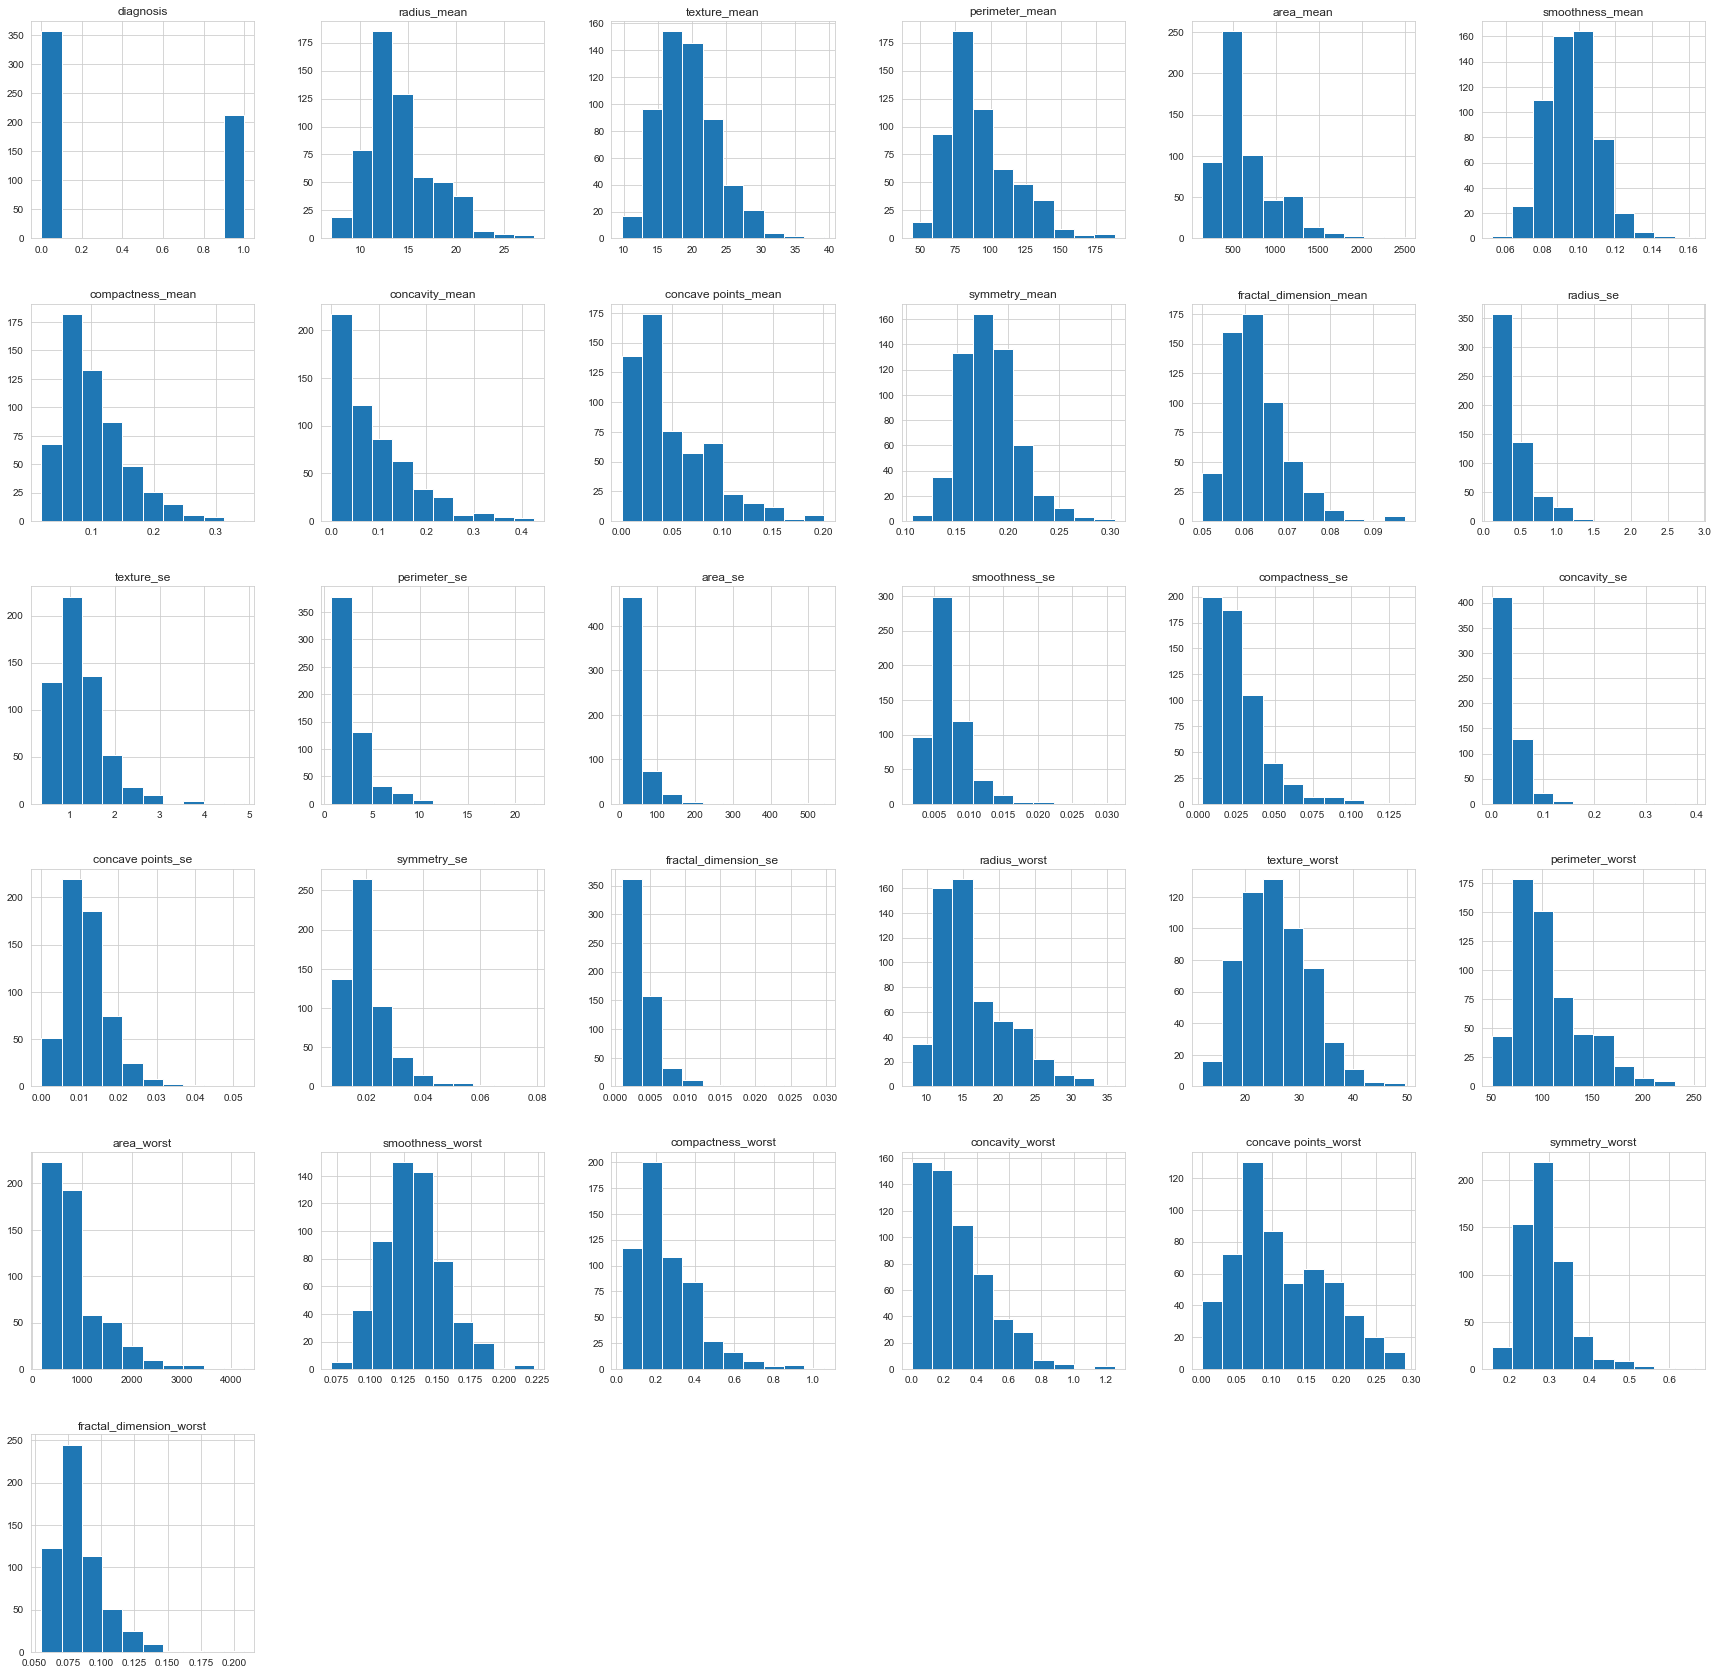

In [68]:
df.hist(figsize = (30,30))

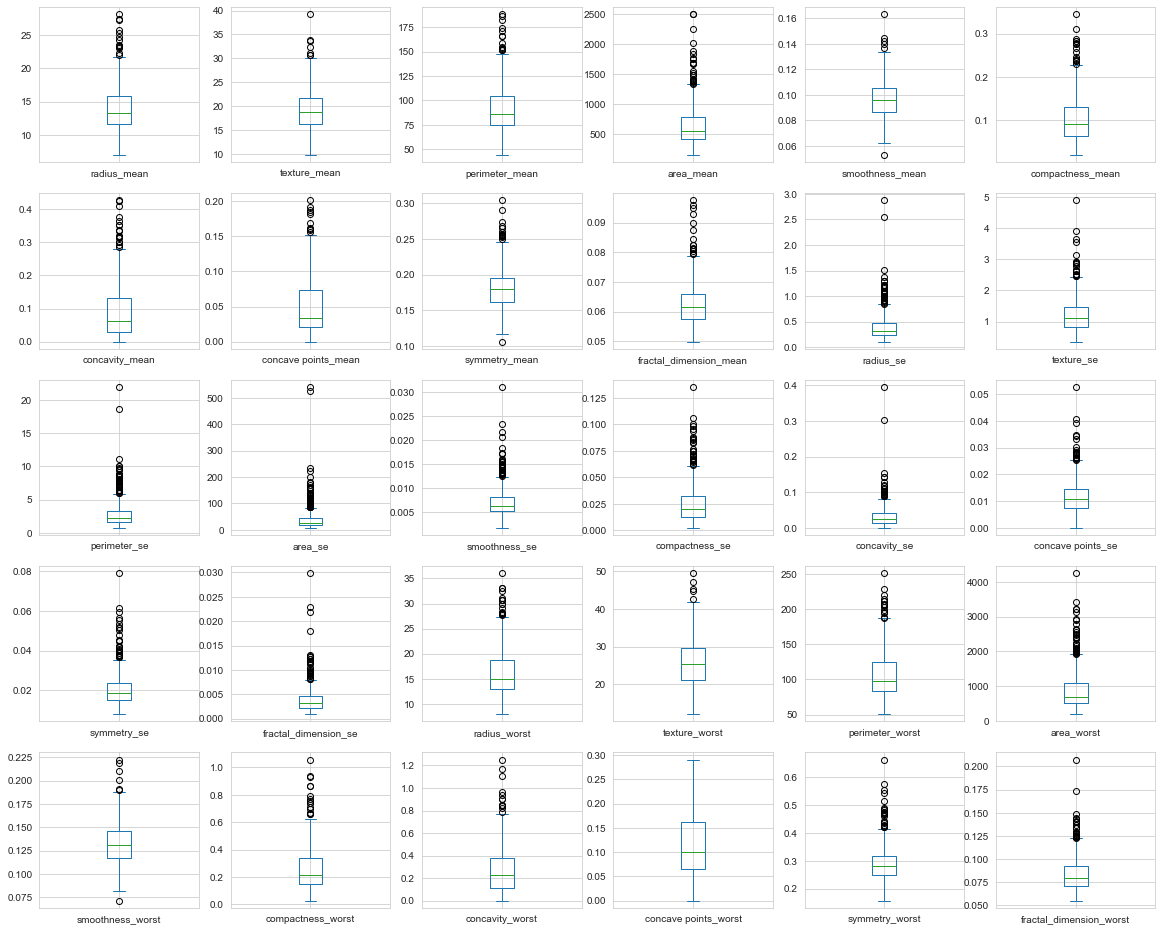

In [69]:
#Visualise using boxplots (scan for outliers)
df_copy = df.drop("diagnosis", axis=1)  # create a copy without the diagnosis column

# Create the box plot
df_copy.plot(kind="box", subplots=True, layout=(6,6), figsize=(20,20))
plt.show()

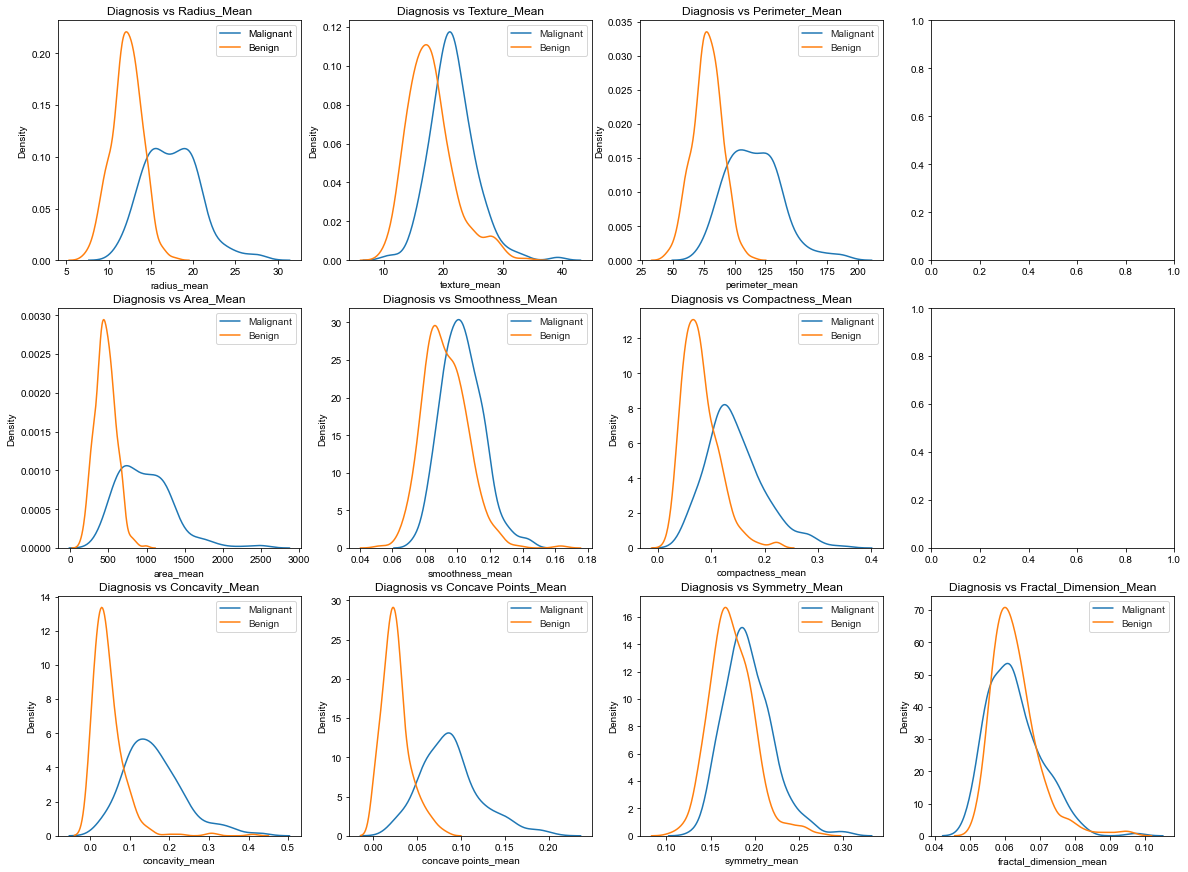

In [12]:
#Visualise for Diagnosis and Radius_Mean 
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

#Radius_Mean
#sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['radius_mean'],ax=axes[0, 0])
sns.kdeplot(df[df['diagnosis'] == 0]['radius_mean'],ax=axes[0, 0])
axes[0, 0].set_title('Diagnosis vs Radius_Mean')
axes[0, 0].legend(labels=['Malignant', 'Benign'])

#Texture_Mean
#fig = plt.figure(figsize = (5, 5))
sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['texture_mean'],ax=axes[0, 1])
sns.kdeplot(df[df['diagnosis'] == 0]['texture_mean'],ax=axes[0, 1])
axes[0, 1].set_title('Diagnosis vs Texture_Mean')
axes[0, 1].legend(labels=['Malignant', 'Benign'])

#Perimeter_Mean
#fig = plt.figure(figsize = (5, 5))
sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['perimeter_mean'],ax=axes[0, 2])
sns.kdeplot(df[df['diagnosis'] == 0]['perimeter_mean'],ax=axes[0, 2])
axes[0, 2].set_title('Diagnosis vs Perimeter_Mean')
axes[0, 2].legend(labels=['Malignant', 'Benign'])

#Area_Mean
#fig = plt.figure(figsize = (5, 5))
sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['area_mean'],ax=axes[1, 0])
sns.kdeplot(df[df['diagnosis'] == 0]['area_mean'],ax=axes[1, 0])
axes[1, 0].set_title('Diagnosis vs Area_Mean')
axes[1, 0].legend(labels=['Malignant', 'Benign'])

#Smoothness_Mean
#fig = plt.figure(figsize = (5, 5))
sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['smoothness_mean'],ax=axes[1, 1])
sns.kdeplot(df[df['diagnosis'] == 0]['smoothness_mean'],ax=axes[1, 1])
axes[1, 1].set_title('Diagnosis vs Smoothness_Mean')
axes[1, 1].legend(labels=['Malignant', 'Benign'])

#Compactness_Mean
#fig = plt.figure(figsize = (5, 5))
sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['compactness_mean'],ax=axes[1, 2])
sns.kdeplot(df[df['diagnosis'] == 0]['compactness_mean'],ax=axes[1, 2])
axes[1, 2].set_title('Diagnosis vs Compactness_Mean')
axes[1, 2].legend(labels=['Malignant', 'Benign'])

#Concavity_Mean
#fig = plt.figure(figsize = (5, 5))
sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['concavity_mean'],ax=axes[2, 0])
sns.kdeplot(df[df['diagnosis'] == 0]['concavity_mean'],ax=axes[2, 0])
axes[2, 0].set_title('Diagnosis vs Concavity_Mean')
axes[2, 0].legend(labels=['Malignant', 'Benign'])

#Concave Points_Mean
#fig = plt.figure(figsize = (5, 5))
sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['concave points_mean'],ax=axes[2, 1])
sns.kdeplot(df[df['diagnosis'] == 0]['concave points_mean'],ax=axes[2, 1])
axes[2, 1].set_title('Diagnosis vs Concave Points_Mean')
axes[2, 1].legend(labels=['Malignant', 'Benign'])

#Symmetry_Mean
#fig = plt.figure(figsize = (5, 5))
sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['symmetry_mean'],ax=axes[2, 2])
sns.kdeplot(df[df['diagnosis'] == 0]['symmetry_mean'],ax=axes[2, 2])
axes[2, 2].set_title('Diagnosis vs Symmetry_Mean')
axes[2, 2].legend(labels=['Malignant', 'Benign'])

#Fractal_Dimension_Mean
#fig = plt.figure(figsize = (5, 5))
sns.set_style("white")
sns.color_palette("bright")
sns.kdeplot(df[df['diagnosis'] == 1]['fractal_dimension_mean'],ax=axes[2, 3])
sns.kdeplot(df[df['diagnosis'] == 0]['fractal_dimension_mean'],ax=axes[2, 3])
axes[2, 3].set_title('Diagnosis vs Fractal_Dimension_Mean')
axes[2, 3].legend(labels=['Malignant', 'Benign'])

In [13]:
#Note: using standardscaler for visualization purposes, model building will leverage on Z-Score due to outliers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_df_pca = scaler.transform(df)

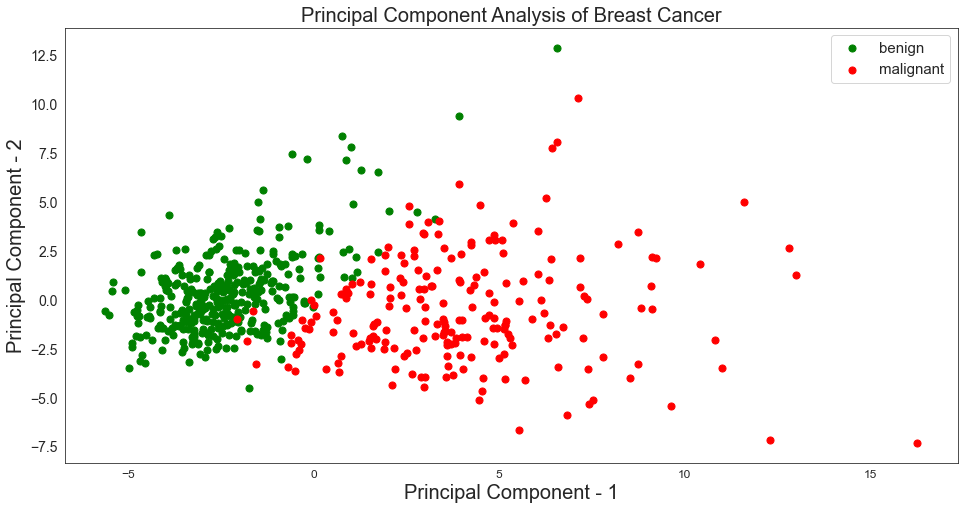

In [14]:
#Visualisation of cluster in dataset using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_df_pca)
x_pca = pca.transform(scaled_df_pca)
pca_df = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])

plt.figure(figsize=(16,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer",fontsize=20)

# Replace 0 with 'benign' and 1 with 'malignant' temporarily for visualization
df_vis = df.copy()
df_vis['diagnosis'] = df_vis['diagnosis'].replace({0: 'benign', 1: 'malignant'})

targets = ['benign', 'malignant']
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = df_vis['diagnosis'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

# Revert the changes made to the 'diagnosis' column
df_vis['diagnosis'] = df_vis['diagnosis'].replace({'benign': 0, 'malignant': 1})



<h1> From the Data Visualisations above, we can derive that: </h1>

<p1> 1. The data is neatly segregated into both categories "benign" and "malignant" as per the PCA plot. </p1>

<p2> 2. There are outliers present amongst the various boxplots for the features. This showcases that leveraging on minmax scaler to standardise the data may not be appropriate since the intervals would be determined by the outliers themselves.
    

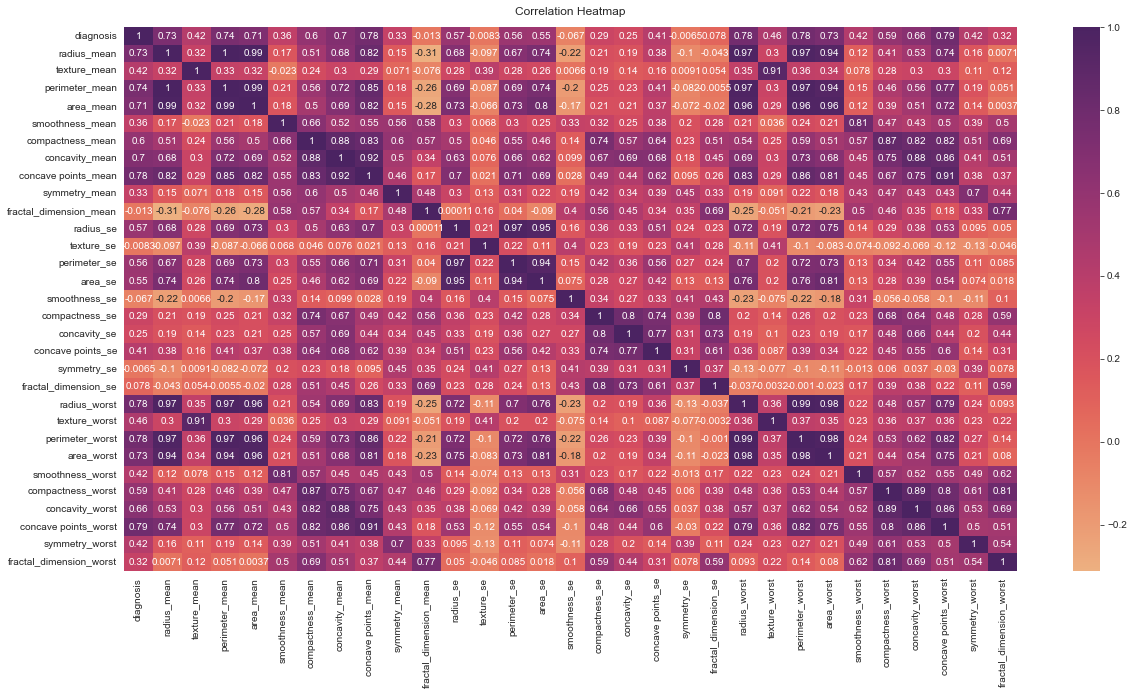

In [15]:
# PLOTTING HEATMAP FOR VISUALISING CORRELATION BETWEEN FEATURES
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(),cmap='flare',annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

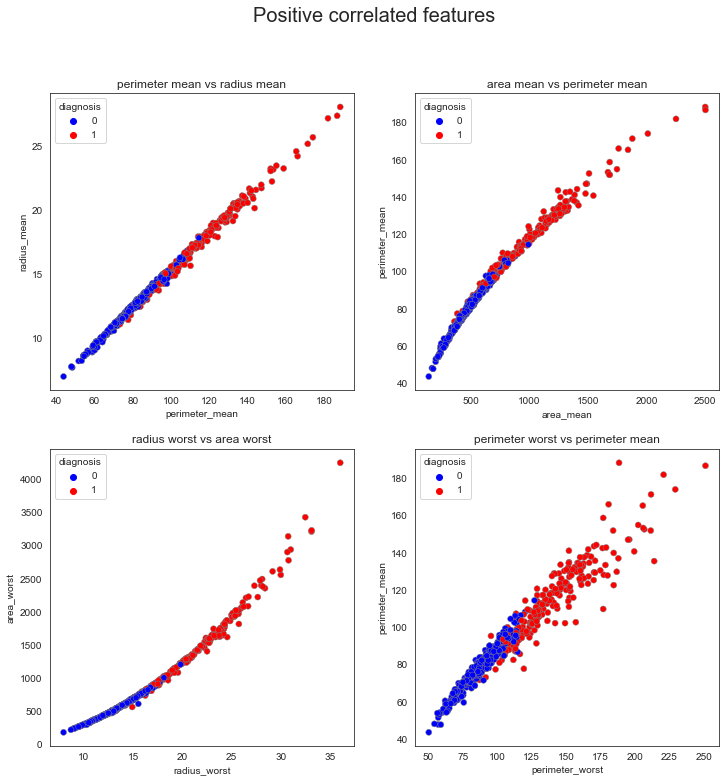

In [16]:
#4 samples of positive correlated features

palette ={0 : 'blue', 1 : 'red'}
edgecolor = 'grey'

fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['perimeter_mean'], y = df['radius_mean'], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['area_mean'], y = df['perimeter_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs perimeter mean')
plt.subplot(223)
ax3 = sns.scatterplot(x = df['radius_worst'], y = df['area_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius worst vs area worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = df['perimeter_worst'], y = df['perimeter_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('perimeter worst vs perimeter mean')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

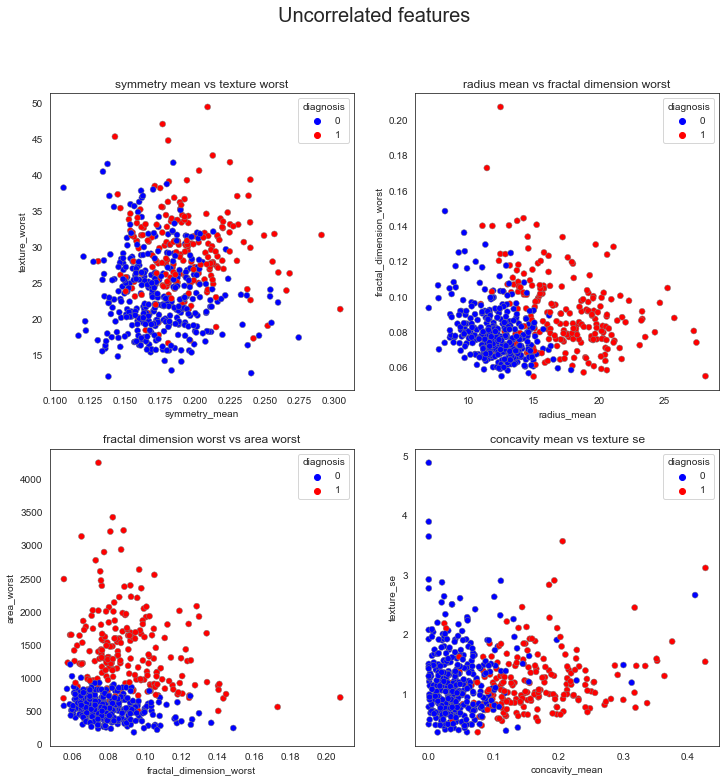

In [17]:
#4 samples of uncorrelated features
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['symmetry_mean'], y = df['texture_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('symmetry mean vs texture worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['radius_mean'], y = df['fractal_dimension_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = df['fractal_dimension_worst'], y = df['area_worst'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('fractal dimension worst vs area worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = df['concavity_mean'], y = df['texture_se'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('concavity mean vs texture se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()

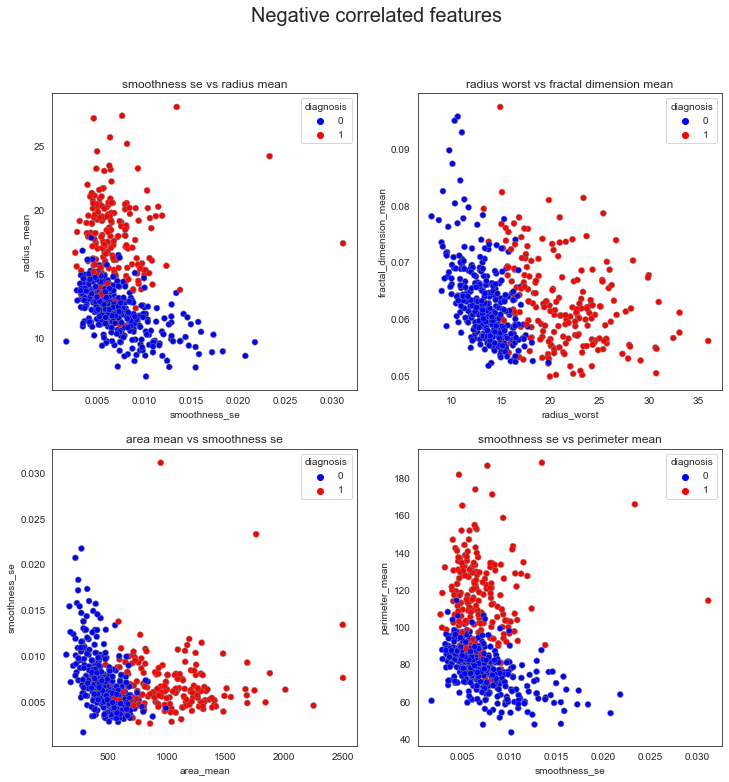

In [18]:
#4 samples of negatively correlated features
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = df['smoothness_se'], y = df['radius_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs radius mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = df['radius_worst'], y = df['fractal_dimension_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius worst vs fractal dimension mean')
plt.subplot(223)
ax2 = sns.scatterplot(x = df['area_mean'], y = df['smoothness_se'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs smoothness se')
plt.subplot(224)
ax2 = sns.scatterplot(x = df['smoothness_se'], y = df['perimeter_mean'], hue = "diagnosis",
                    data = df, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.savefig('3')
plt.show()

<h1> Feature Selection to determine preliminary set of variables to include to train-test </h1>

<p1> We will first leverage on point-biserial correlation to remove insignificant variables that have minimal correlation with the "Diagnosis" variable </p1>

<p2> Next, we will conduct the pearson correlation coefficient method to identify multicorrelated features. </p2>

<p3> Finally, using the point-biserial correlation scores for each individual feature, instead of randomly removing features from the pearson method, we will remove the feature that has the **lower point-biserial score**. </p3>

In [19]:
#To get the point-biserial correlation for each column to "Diagnosis"
corr_list = []
y = df['diagnosis'].astype(float)

for column in df:
    x=df[column]
    corr = stats.pointbiserialr(list(x), list(y))
    corr_list.append(corr[0])
    
point_biserialdf = pd.DataFrame(data = corr_list, index = df.columns, columns = ['Correlation Score to Diagnosis'])
point_biserialdf

,Correlation Score to Diagnosis
diagnosis,1.000000
radius_mean,0.730029
texture_mean,0.415185
perimeter_mean,0.742636
area_mean,0.708984
smoothness_mean,0.358560
compactness_mean,0.596534
concavity_mean,0.696360
concave points_mean,0.776614
symmetry_mean,0.330499


In [20]:
#Features with an insignificant Point-Biserial Score -> to be removed in the trainset
point_biserialdf[point_biserialdf["Correlation Score to Diagnosis"] < 0.1]

,Correlation Score to Diagnosis
fractal_dimension_mean,-0.012838
texture_se,-0.008303
smoothness_se,-0.067016
symmetry_se,-0.006522
fractal_dimension_se,0.077972


In [21]:
#Define functions to return pair of correlated variables
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

#Output top 8 combinations that exhibit the highest level of multi-collinearity
print(get_top_abs_correlations(df, 8))

radius_mean      perimeter_mean     0.997855
radius_worst     perimeter_worst    0.993708
radius_mean      area_mean          0.987357
perimeter_mean   area_mean          0.986507
radius_worst     area_worst         0.984015
perimeter_worst  area_worst         0.977578
radius_se        perimeter_se       0.972794
perimeter_mean   perimeter_worst    0.970387
dtype: float64


<p1> Based on the pearson correlation values as denoted above, we know that the common attribute of features exhibiting high multicollinearity are radius, perimeter and area. This is expected, since radius is used to derive the perimeter values and area values for the tumour, resulting in these features being highly correlated with each other. </p1>

<p2> Based on the point-biserial correlation, we can remove the variable that exhibits the lowest point-biserial score, so as to ensure only important features are being kept to train the model. <p2>
    
<p3> For example, since radius_mean has a lower point-biserial score than perimeter_mean, we will be removing the radius_mean feature from the multicollinear relationship between radius_mean and perimeter_mean. <p3>
    
<p4> This results in us removing: **"radius_mean", "radius_worst", "area_mean", "area_worst", "perimeter_se", "perimeter_worst"**.
    
<p5> Together with the insignificant features as denoted by the point-biserial correlation score alone, we will have to remove a total of **11 features**, leaving us with a total of 19 features, excluding the "diagnosis" feature.

In [70]:
#Dropping the redundant variables indicated by point-biserial and pearson correlation scores
redundant_variables = ["radius_mean", "radius_worst", "area_mean", "area_worst", "perimeter_se", 
                       "perimeter_worst", "fractal_dimension_mean", "fractal_dimension_se", "texture_se",
                      "smoothness_se", "symmetry_se"]
df = df.drop(redundant_variables, axis=1)
print(df.columns)

Index(['diagnosis', 'texture_mean', 'perimeter_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'radius_se', 'area_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


<h1> Conduct Train-Test Split based on 70:30 ratio: </h1>

<p1> Thereafter, down-sample the trainset and standardise the remaining dataset using Z-Score </p1>

In [23]:
#Train-test split, set random_state = 1
X = df.drop(columns = "diagnosis")
Y = df["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 1)

In [24]:
#To check the number of category of Y and imbalance of data.
Y_train.value_counts()

0    249
1    149
Name: diagnosis, dtype: int64

In [25]:
#Perform under-sampling on trainset
##https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# summarize class distribution
print("Before undersampling: ", Counter(Y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 1)

# fit and apply the transform
X_train, Y_train = undersample.fit_resample(X_train, Y_train)

# summarize class distribution
print("After undersampling: ", Counter(Y_train))

Before undersampling:  Counter({0: 249, 1: 149})
After undersampling:  Counter({0: 149, 1: 149})


In [26]:
#Standardising the dataset via z-score using StandardScaler
from sklearn.preprocessing import StandardScaler

# Compute the mean and standard deviation of each feature in the trainset
scaler = StandardScaler().fit(X_train)

# Standardize the trainset by subtracting the mean from each feature and dividing by the standard deviation
X_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Apply the same transformation to the testset using the mean and standard deviation from the trainset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

<h1> Model selection: I will be using logistic regression, decision tree and random forest and derive their respective feature importances </h1>

<p1> This step refers to the additional feature selection procedure, where after deriving each model's feature importance, I will then compile the top few highly ranked features across all models and use this as the final dataset for deriving the performance metrics for each model </p1>

In [86]:
#To determine the accuracy from using logistic regression model
logistic_model = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 1000, random_state = 1)
logistic_model.fit(X_train, Y_train)
logistic_pred = logistic_model.predict(X_test)
cm = confusion_matrix(Y_test, logistic_pred)
print("Logistic Regression Accuracy is: ", round((cm[0,0]+cm[1,1])/sum(sum(cm)),3))
print("Logistic Recall is: ", round(cm[1,1] / (cm[1,1] + cm[1,0]), 3))

Logistic Regression Accuracy is:  0.971
Logistic Recall is:  0.968


In [28]:
# Get the absolute values of the coefficients
coef_abs = np.abs(logistic_model.coef_)

# Get the feature names
feature_names = X.columns

# Create a dataframe with the feature names and their absolute coefficients
coef_df = pd.DataFrame({'feature': feature_names, 'coef_abs': coef_abs[0]})

# Sort the dataframe by the absolute coefficients
coef_df = coef_df.sort_values(by='coef_abs', ascending=False)

# Print the feature importance
print(coef_df)

                    feature  coef_abs
1            perimeter_mean  1.952220
7                 radius_se  1.466542
16     concave points_worst  1.284936
5       concave points_mean  1.279464
8                   area_se  1.136644
9            compactness_se  0.877551
15          concavity_worst  0.858603
12            texture_worst  0.844950
17           symmetry_worst  0.735317
4            concavity_mean  0.711031
10             concavity_se  0.476436
11        concave points_se  0.372949
14        compactness_worst  0.356099
13         smoothness_worst  0.341917
3          compactness_mean  0.266425
0              texture_mean  0.248808
6             symmetry_mean  0.242932
18  fractal_dimension_worst  0.206891
2           smoothness_mean  0.162312


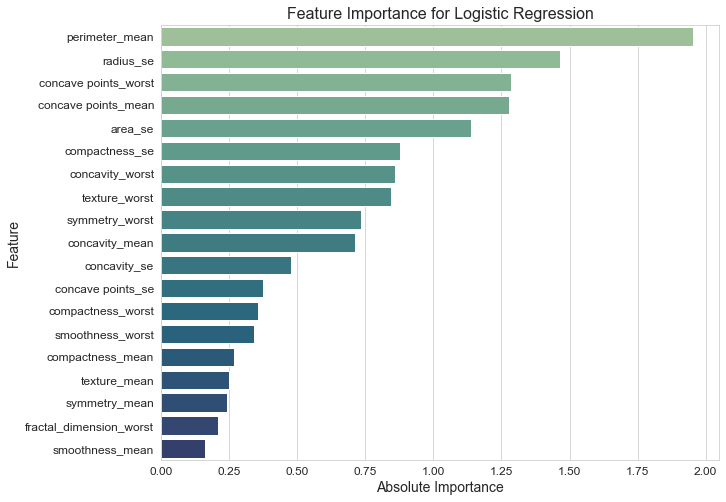

In [29]:
# calculate feature importances
importance = abs(logistic_model.coef_[0])
features = X_train.columns.tolist()

# create dataframe with feature importances
df_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# create horizontal barplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='crest')
plt.title('Feature Importance for Logistic Regression', fontsize=16)
plt.xlabel('Absolute Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [87]:
#To determine the accuracy from using decision tree model
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(random_state = 1)
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(X_test)
cm = confusion_matrix(Y_test, tree_pred)
print("Decision Tree Accuracy is: ", round((cm[0,0] + cm[1,1]) / sum(sum(cm)),3))
print("Decision Tree Recall is: ", round(cm[1,1] / (cm[1,1] + cm[1,0]), 3))

Decision Tree Accuracy is:  0.924
Decision Tree Recall is:  0.952


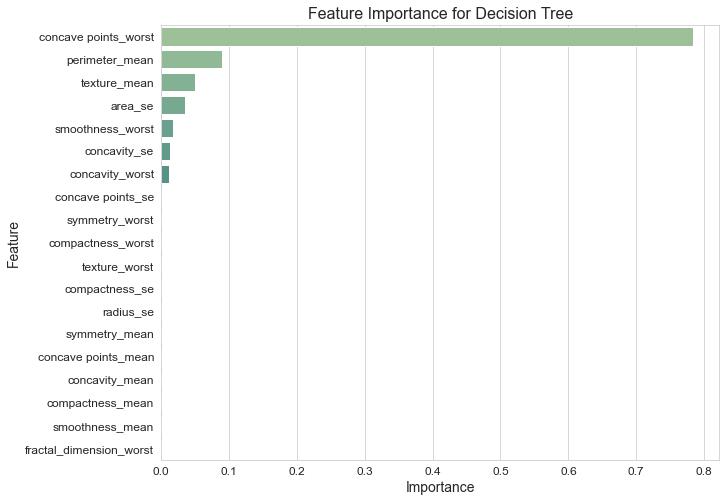

In [31]:
importance = tree_model.feature_importances_
features = X_train.columns.tolist()

# create dataframe with feature importances
df_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# create horizontal barplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='crest')
plt.title('Feature Importance for Decision Tree', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [88]:
#To determine the accuracy from using random forest model
from sklearn import ensemble
rf_model = ensemble.RandomForestClassifier(random_state = 1)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
cm = confusion_matrix(Y_test, rf_pred)
print("Random Forest Accuracy is: ", round((cm[0,0] + cm[1,1]) / sum(sum(cm)),3))
print("Random Forest Recall is: ", round(cm[1,1] / (cm[1,1] + cm[1,0]), 3))

Random Forest Accuracy is:  0.936
Random Forest Recall is:  0.937


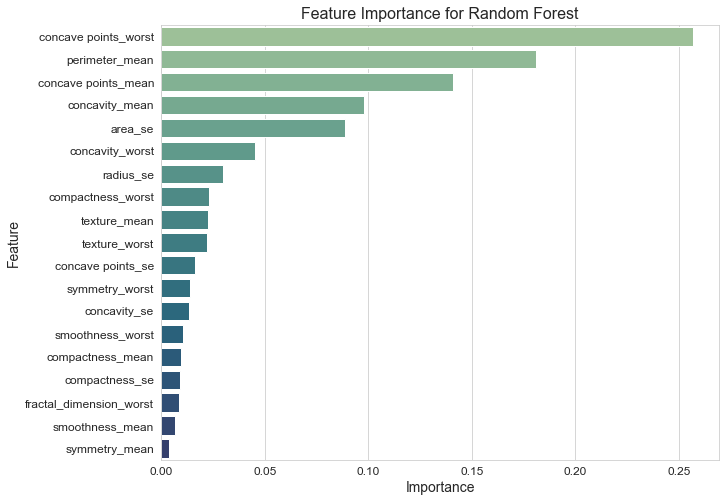

In [33]:
importance = rf_model.feature_importances_
features = X_train.columns.tolist()

# create dataframe with feature importances
df_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# create horizontal barplot using seaborn
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='crest')
plt.title('Feature Importance for Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [34]:
# Compute feature importance for each model
lr_importance = abs(logistic_model.coef_[0])
rf_importance = rf_model.feature_importances_
dt_importance = tree_model.feature_importances_

# Create dataframes with feature importances
lr_df = pd.DataFrame({'Feature': X_train.columns.tolist(), 'Importance': lr_importance})
rf_df = pd.DataFrame({'Feature': X_train.columns.tolist(), 'Importance': rf_importance})
dt_df = pd.DataFrame({'Feature': X_train.columns.tolist(), 'Importance': dt_importance})

# Rank features within each model by importance
lr_df = lr_df.sort_values(by='Importance', ascending=False)
rf_df = rf_df.sort_values(by='Importance', ascending=False)
dt_df = dt_df.sort_values(by='Importance', ascending=False)

# Identify top N features for each model
N = 14
lr_top_features = lr_df.head(N)['Feature'].tolist()
rf_top_features = rf_df.head(N)['Feature'].tolist()
dt_top_features = dt_df.head(N)['Feature'].tolist()

# Find intersection of top N features for each model
common_features = list(set(lr_top_features) & set(rf_top_features) & set(dt_top_features))
common_features

['concavity_se',
 'perimeter_mean',
 'concave points_worst',
 'symmetry_worst',
 'radius_se',
 'concave points_se',
 'texture_worst',
 'smoothness_worst',
 'area_se',
 'concavity_worst',
 'compactness_worst']

<h1> The common features that are highly ranked across the 3 machine learning models (logistic regression, random forest and decision tree) are: </h1>

<p1> **Features List**: 'concavity_se', 'perimeter_mean', 'concave points_worst', 'symmetry_worst', 'radius_se', 'concave points_se', 'texture_worst', 'smoothness_worst', 'area_se', 'concavity_worst', 'compactness_worst'

<p2> Now, using these **11 features**, I will be using these features to develop the new models before comparing their accuracy, false positive, false negative, precision and recall metrics and inputting them into a table </p2>

In [35]:
# train new logistic regression model using selected features
new_logistic_model = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)
new_logistic_model.fit(X_train[common_features], Y_train)

# make predictions and evaluate model accuracy
new_logistic_pred = new_logistic_model.predict(X_test[common_features])
lr_cm = confusion_matrix(Y_test, new_logistic_pred)
print("New Logistic Regression Accuracy is: ", round((lr_cm[0,0]+lr_cm[1,1])/sum(sum(lr_cm)),3))
lr_accuracy = round((lr_cm[0,0]+lr_cm[1,1])/sum(sum(lr_cm)),3)
lr_false_pos_rate = round(lr_cm[0,1] / (lr_cm[0,1] + lr_cm[0,0]), 3)
lr_false_neg_rate = round(lr_cm[1,0] / (lr_cm[1,0] + lr_cm[1,1]), 3)
lr_precision = round(lr_cm[1,1] / (lr_cm[1,1] + lr_cm[0,1]), 3)
lr_recall = round(lr_cm[1,1] / (lr_cm[1,1] + lr_cm[1,0]), 3)

# train new decision tree model using selected features
new_tree_model = tree.DecisionTreeClassifier(random_state=1)
new_tree_model.fit(X_train[common_features], Y_train)

# make predictions and evaluate model accuracy
new_tree_pred = new_tree_model.predict(X_test[common_features])
tree_cm = confusion_matrix(Y_test, new_tree_pred)
print("New Decision Tree Accuracy is: ", round((tree_cm[0,0] + tree_cm[1,1]) / sum(sum(tree_cm)),3))
tree_accuracy = round((tree_cm[0,0]+tree_cm[1,1])/sum(sum(tree_cm)),3)
tree_false_pos_rate = round(tree_cm[0,1] / (tree_cm[0,1] + tree_cm[0,0]), 3)
tree_false_neg_rate = round(tree_cm[1,0] / (tree_cm[1,0] + tree_cm[1,1]), 3)
tree_precision = round(tree_cm[1,1] / (tree_cm[1,1] + tree_cm[0,1]), 3)
tree_recall = round(tree_cm[1,1] / (tree_cm[1,1] + tree_cm[1,0]), 3)

# train new random forest model using selected features
new_rf_model = ensemble.RandomForestClassifier(random_state=1)
new_rf_model.fit(X_train[common_features], Y_train)

# make predictions and evaluate model accuracy
new_rf_pred = new_rf_model.predict(X_test[common_features])
rf_cm = confusion_matrix(Y_test, new_rf_pred)
print("New Random Forest Accuracy is:", round((rf_cm[0,0] + rf_cm[1,1]) / sum(sum(rf_cm)), 3))
rf_accuracy = round((rf_cm[0,0]+rf_cm[1,1])/sum(sum(rf_cm)),3)
rf_false_pos_rate = round(rf_cm[0,1] / (rf_cm[0,1] + rf_cm[0,0]), 3)
rf_false_neg_rate = round(rf_cm[1,0] / (rf_cm[1,0] + rf_cm[1,1]), 3)
rf_precision = round(rf_cm[1,1] / (rf_cm[1,1] + rf_cm[0,1]), 3)
rf_recall = round(rf_cm[1,1] / (rf_cm[1,1] + rf_cm[1,0]), 3)

New Logistic Regression Accuracy is:  0.971
New Decision Tree Accuracy is:  0.918
New Random Forest Accuracy is: 0.912


In [36]:
#Formatting the values into a table
from tabulate import tabulate

# Create a list of dictionaries containing the evaluation metrics for each model
models = [
    {'Model': 'Logistic Regression', 'Accuracy': lr_accuracy, 'False Positive Rate': lr_false_pos_rate, 
     'False Negative Rate': lr_false_neg_rate, 'Precision': lr_precision, 'Recall': lr_recall},
    {'Model': 'Decision Tree', 'Accuracy': tree_accuracy, 'False Positive Rate': tree_false_pos_rate, 
     'False Negative Rate': tree_false_neg_rate, 'Precision': tree_precision, 'Recall': tree_recall},
    {'Model': 'Random Forest', 'Accuracy': rf_accuracy, 'False Positive Rate': rf_false_pos_rate, 
     'False Negative Rate': rf_false_neg_rate, 'Precision': rf_precision, 'Recall': rf_recall}
]

# Use tabulate to format the list of dictionaries into a table
table = tabulate(models, headers='keys', tablefmt='psql')

# Print the table
print(table)

+---------------------+------------+-----------------------+-----------------------+-------------+----------+
| Model               |   Accuracy |   False Positive Rate |   False Negative Rate |   Precision |   Recall |
|---------------------+------------+-----------------------+-----------------------+-------------+----------|
| Logistic Regression |      0.971 |                 0.028 |                 0.032 |       0.953 |    0.968 |
| Decision Tree       |      0.918 |                 0.102 |                 0.048 |       0.845 |    0.952 |
| Random Forest       |      0.912 |                 0.093 |                 0.079 |       0.853 |    0.921 |
+---------------------+------------+-----------------------+-----------------------+-------------+----------+


<h1> How to improve the results through programming by changing the parameter settings </h1>

<p1> **Hyperparameter** tuning can drastically improve the performance of the models. During the training process, the performance of the model is evaluated by monitoring metrics such as the values of the loss function or the accuracy score on the test set, on which the hyperparameters can be fine-tuned to improve the model performance. The reason for tuning hyperparameters is because we do not really know the optimal values in advance. 

There are two ways to tune these hyperparameters: 

1. Grid Search 
2. Random Search

**Grid Search**:  In grid search, a.k.a brute force search, a grid of hyperparameter values are set up for evaluation, which enumerates every combination of hyperparameters. The GridSearchCV is a model selection step in sklearn that allows us to search through the best parameter values from the given set of the grid of parameters. It is a simple and exhaustive method that can gurantee finding the best combingation of hyperparameters within the specified grid, but can be computationally expensive when dealing with large number of parameters.

**Random Search**: In random search, a.k.a. randomly sampling hyperparameters, it selects random combinations of hyperparameters to train the model, which over the same domain is able to find models that are robust within a fraction of the computation time of a grid search. The RandomizedSearchCV from sklearn allows us to perform a random search on a classifier with a certain number of hyperparameter combinations picked at random. Random search has been shown to be sufficiently efficient for learning neural networks for several datasets, and furthermore is known to be more efficient than grid search when dealing with a large number of hyperparameters or a large search space. However, there is no gurantee that it will find the best combination of hyperparameters.

For this situation, I will use **grid search** as an example for this exercise to find the best hyperparameters for the Decision Tree and Random Forest model to showcase this phenomenon. </p1>

In [37]:
#Setting parameter of max_depth to test for Decision Tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
hyperparameters = {'criterion': ['gini', 'entropy'],
                   'max_depth': [5, 10, None],
                   'min_samples_split': [1, 2, 3],
                   'min_samples_leaf': [1, 2, 3]}

grid = GridSearchCV(estimator = new_tree_model, param_grid = hyperparameters,cv=5, scoring = 'accuracy')
grid = grid.fit(X_train[common_features], Y_train)

print('\nBest hyperparameters:')
print(grid.best_params_)
print('Best score:')
print(grid.best_score_)
new_tree_model_tuned = tree.DecisionTreeClassifier(**grid.best_params_ ,random_state=1)
new_tree_model_tuned.fit(X_train[common_features], Y_train)
new_tree_pred_tuned = new_tree_model_tuned.predict(X_test[common_features])
tree_cm_tuned = confusion_matrix(Y_test, new_tree_pred_tuned)
print("New Decision Tree Accuracy is: ", round((tree_cm_tuned[0,0] + tree_cm_tuned[1,1]) / sum(sum(tree_cm_tuned)),3))


Best hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score:
0.9563276836158192
New Decision Tree Accuracy is:  0.924


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# create the random forest classifier
rf_model = RandomForestClassifier(random_state=1)

# create the grid search object
grid_search = GridSearchCV(estimator= new_rf_model, param_grid=param_grid, cv=5, scoring = 'accuracy')

# fit the grid search object to the training data
grid_search.fit(X_train[common_features], Y_train)

# get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# print the best parameters, best score, and accuracy of the new model
print('Best parameters:', best_params)
print('Best score:', best_score)

new_rf_model_tuned = ensemble.RandomForestClassifier(**grid.best_params_)
new_rf_model_tuned.fit(X_train[common_features], Y_train)
new_rf_pred_tuned = new_rf_model.predict(X_test[common_features])
rf_cm_tuned = confusion_matrix(Y_test, new_rf_pred_tuned)
print("Random Forest Accuracy with selected features is:", round((rf_cm_tuned[0,0] + rf_cm_tuned[1,1]) / sum(sum(rf_cm_tuned)), 3))

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9562711864406779
Random Forest Accuracy with selected features is: 0.912


<p1> From the above gridsearch results, the accuracy for the decision tree model improved to 0.924, whilst the random forest model retained its original accuracy of 0.912. </p1>

<h1> Plotting the confusion matrix for visualisation </h1>

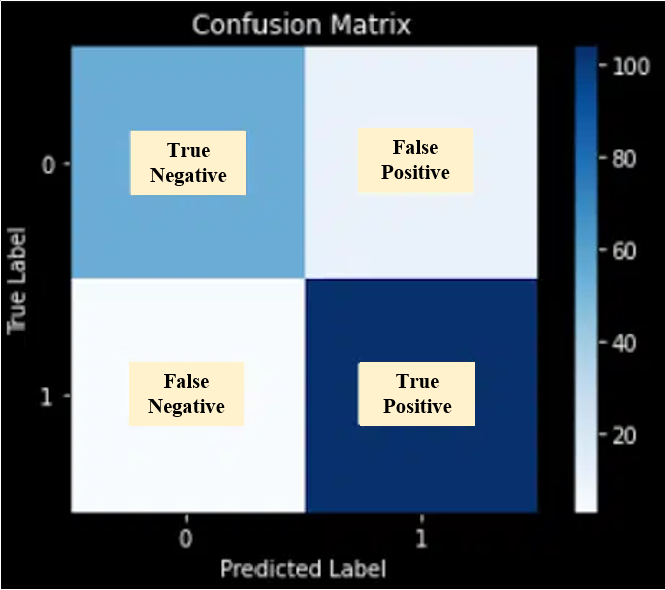



I will plot the confusion matrix using the above image as reference for the labels.

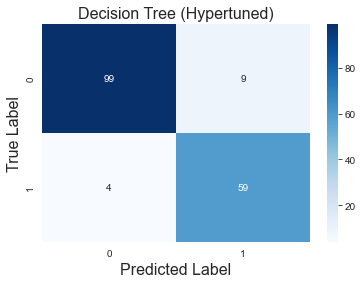

array([[99,  9],
       [ 4, 59]], dtype=int64)

In [48]:
#Confusion matrix for Decision Tree model using TUNED model (as the accuracy went up)
tree_confusion_matrix = metrics.confusion_matrix(Y_test, new_tree_pred_tuned)
sns.heatmap(tree_confusion_matrix, annot=True, cmap = "Blues", fmt = "d")
plt.title('Decision Tree (Hypertuned)', fontsize=16)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.show()
tree_confusion_matrix

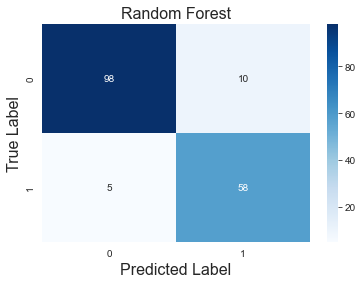

array([[98, 10],
       [ 5, 58]], dtype=int64)

In [45]:
#Confusion matrix for Random Forest model
rf_confusion_matrix = metrics.confusion_matrix(Y_test, new_rf_pred)
sns.heatmap(rf_confusion_matrix, annot=True, cmap = "Blues", fmt="d")

plt.title('Random Forest', fontsize=16)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.show()
rf_confusion_matrix

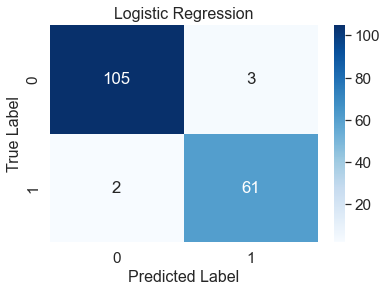

array([[105,   3],
       [  2,  61]], dtype=int64)

In [85]:
#Confusion matrix for Logistic model
log_confusion_matrix = metrics.confusion_matrix(Y_test, new_logistic_pred)
sns.heatmap(log_confusion_matrix, annot=True, cmap = "Blues", fmt="d")

plt.title('Logistic Regression', fontsize=16)
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.show()
log_confusion_matrix

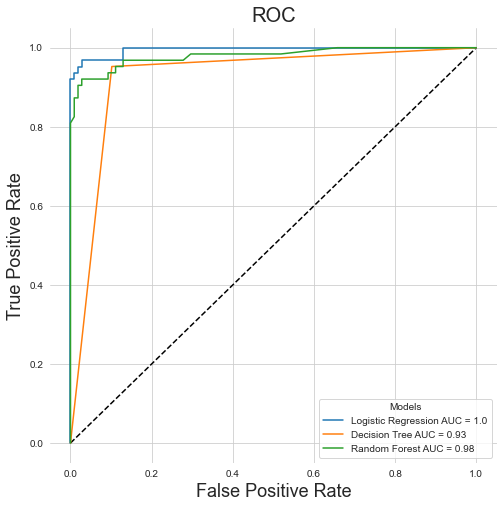

In [42]:
#Logistic Model 
log_pred_proba = new_logistic_model.predict_proba(X_test[common_features])[:,1] # Probabilities of the labels of the test set
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  log_pred_proba) # Unpacak the variables
auc1 = metrics.roc_auc_score(Y_test, log_pred_proba)

#Decision Tree Model
tree_pred_prob = new_tree_model.predict_proba(X_test[common_features])[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  tree_pred_prob)
auc2 = metrics.roc_auc_score(Y_test, tree_pred_prob)

#Random Forest Model
rf_pred_prob = new_rf_model.predict_proba(X_test[common_features])[:,1]
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  rf_pred_prob)
auc3 = metrics.roc_auc_score(Y_test, rf_pred_prob)

plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Logistic Regression AUC = " + str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree AUC = " + str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Random Forest AUC = " + str(round(auc3,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate',size=18)
plt.ylabel('True Positive Rate',size=18)
plt.title('ROC',size=20)
plt.box(False)

Receiver Operating Characteristic (**ROC**) curve is a plot of the true positive rate against the false positive rate.
If the Area Under Curve (**AUC**) is high, the model is better distinguishing between positive and negative class.

From the ROC plot, the highest AUC obtained is from the **Logistic Regression**, with a value of 1.0, but the other models have performed relatively well as well.

<h1> Final Metrics Table for all models (after accounting for hypertuning of parameters): </h1>

In [47]:
#Final Metrics Table with updated values (hypertuned decision tree model)
tree_accuracy = round((tree_cm_tuned[0,0]+tree_cm_tuned[1,1])/sum(sum(tree_cm_tuned)),3)
tree_false_pos_rate = round(tree_cm_tuned[0,1] / (tree_cm_tuned[0,1] + tree_cm_tuned[0,0]), 3)
tree_false_neg_rate = round(tree_cm_tuned[1,0] / (tree_cm_tuned[1,0] + tree_cm_tuned[1,1]), 3)
tree_precision = round(tree_cm_tuned[1,1] / (tree_cm_tuned[1,1] + tree_cm_tuned[0,1]), 3)
tree_recall = round(tree_cm_tuned[1,1] / (tree_cm_tuned[1,1] + tree_cm_tuned[1,0]), 3)

#Formatting the values into a table
from tabulate import tabulate

# Create a list of dictionaries containing the evaluation metrics for each model
models = [
    {'Model': 'Logistic Regression', 'Accuracy': lr_accuracy, 'False Positive Rate': lr_false_pos_rate, 
     'False Negative Rate': lr_false_neg_rate, 'Precision': lr_precision, 'Recall': lr_recall},
    {'Model': 'Decision Tree (Hypertuned)', 'Accuracy': tree_accuracy, 'False Positive Rate': tree_false_pos_rate, 
     'False Negative Rate': tree_false_neg_rate, 'Precision': tree_precision, 'Recall': tree_recall},
    {'Model': 'Random Forest', 'Accuracy': rf_accuracy, 'False Positive Rate': rf_false_pos_rate, 
     'False Negative Rate': rf_false_neg_rate, 'Precision': rf_precision, 'Recall': rf_recall}
]

# Use tabulate to format the list of dictionaries into a table
table = tabulate(models, headers='keys', tablefmt='psql')

# Print the table
print(table)

+----------------------------+------------+-----------------------+-----------------------+-------------+----------+
| Model                      |   Accuracy |   False Positive Rate |   False Negative Rate |   Precision |   Recall |
|----------------------------+------------+-----------------------+-----------------------+-------------+----------|
| Logistic Regression        |      0.971 |                 0.028 |                 0.032 |       0.953 |    0.968 |
| Decision Tree (Hypertuned) |      0.924 |                 0.083 |                 0.063 |       0.868 |    0.937 |
| Random Forest              |      0.912 |                 0.093 |                 0.079 |       0.853 |    0.921 |
+----------------------------+------------+-----------------------+-----------------------+-------------+----------+
